In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


EM (Expectation Maximization) is more powerful & extended way to do MLE (Maximum Likelihood Estimation)

In this case we will use EM to find solve a chicken-egg problem, of:

1. given a bunch of datapoints, there is a unknown latent variable that dictates which distribution a data point belongs to
2. we know there are two gaussians, but don't know their means or std dev's

We can easily find one if we know another, but the problem is that we don't know either, this is where we use EM

In [2]:
#defining some constants, cause I like clean data for examples
MEAN_1 = 3
STD_DEV_1 = 1
MEAN_2 = -2
STD_DEV_2 = 3
SAMPLES = 10

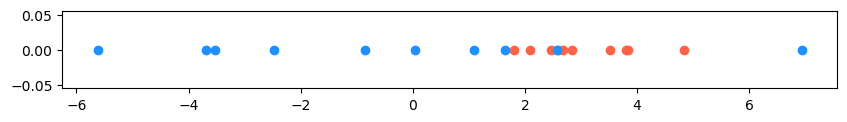

In [3]:
data_1 = np.random.normal(MEAN_1, STD_DEV_1, SAMPLES)
data_2 = np.random.normal(MEAN_2, STD_DEV_2, SAMPLES)
data = np.concatenate([data_1, data_2]) #cause in the real problem we don't know which distribution the data came from

plt.figure(figsize=(10, 1))
plt.plot(data_1, np.zeros_like(data_1), 'o', label='Data 1', color="tomato")
plt.plot(data_2, np.zeros_like(data_2), 'o', label='Data 2', color="dodgerblue")
plt.show()

some helper functions:


In [4]:
def plot_distributions(iteration, x_values, est_mean_1, est_mean_2, est_std_dev_1, est_std_dev_2):
    plt.figure(figsize=(10, 6))
    est_gaussian_1 = gaussian_pdf(x_values, est_mean_1, est_std_dev_1)
    est_gaussian_2 = gaussian_pdf(x_values, est_mean_2, est_std_dev_2)
    plt.plot(x_values, est_gaussian_1, label="estimated gaussian 1")
    plt.plot(x_values, est_gaussian_2, label="estimated gaussian 2")
    plt.plot(x_values, real_gaussian_1, '--', label="real gaussian 1", color="tomato")
    plt.plot(x_values, real_gaussian_2, '--', label="real gaussian 2", color="dodgerblue")
    plt.title(f'Iteration: {iteration}')
    plt.legend()
    plt.xlabel('value')
    plt.ylabel('probability density')
    plt.show()

In [5]:
def gaussian_pdf(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi) + 1e-10)) * np.exp(-0.5 * ((x - mean) / (std_dev + 1e-10) ) ** 2)

### Now we start EM

we define the likelihood as:

$P(x_{i}∣Gaussian_{j})$, where $i \in [1,20]$ and $j \in [1,2]$

In [6]:
threshold = 1e-4  #Convergence threshold
max_iters = 1000  #just in case, to prevent infinite loops
itrs = 0
delta = np.inf  #change in params

x_values = np.linspace(-10, 10, 1000)
estimated_mean_1 = np.random.rand()
estimated_mean_2 = np.random.rand()
estimated_std_dev_1 = np.random.rand()
estimated_std_dev_2 = np.random.rand()

In [7]:
def E_step(estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2):
  likelihood_1 = gaussian_pdf(data, estimated_mean_1, estimated_std_dev_1)
  likelihood_2 = gaussian_pdf(data, estimated_mean_2, estimated_std_dev_2)
  posterior_unnormalized = np.vstack([likelihood_1, likelihood_2])
  #if we start incorporating priors, we start doing MCMC, HMC etc.
  #therefore this is not real posterior, it is technically called responsibilities
  #but I like naming it posterior cause it makes its bayeian roots clear
  posterior = posterior_unnormalized / (posterior_unnormalized.sum(axis=0) + 1e-10)
  return posterior

def M_step(posterior):
  estimated_mean_1 = np.sum(posterior[0] * data) / (np.sum(posterior[0])+ 1e-10)
  estimated_mean_2 = np.sum(posterior[1] * data) / (np.sum(posterior[1])+ 1e-10)
  estimated_std_dev_1 = np.sqrt(np.sum(posterior[0] * (data - estimated_mean_1)**2) / (np.sum(posterior[0]))+ 1e-10)
  estimated_std_dev_2 = np.sqrt(np.sum(posterior[1] * (data - estimated_mean_2)**2) / (np.sum(posterior[1]))+ 1e-10)
  return estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2


In [8]:
real_gaussian_1 = gaussian_pdf(x_values, MEAN_1,STD_DEV_1 )
real_gaussian_2 = gaussian_pdf(x_values, MEAN_2,STD_DEV_2 )

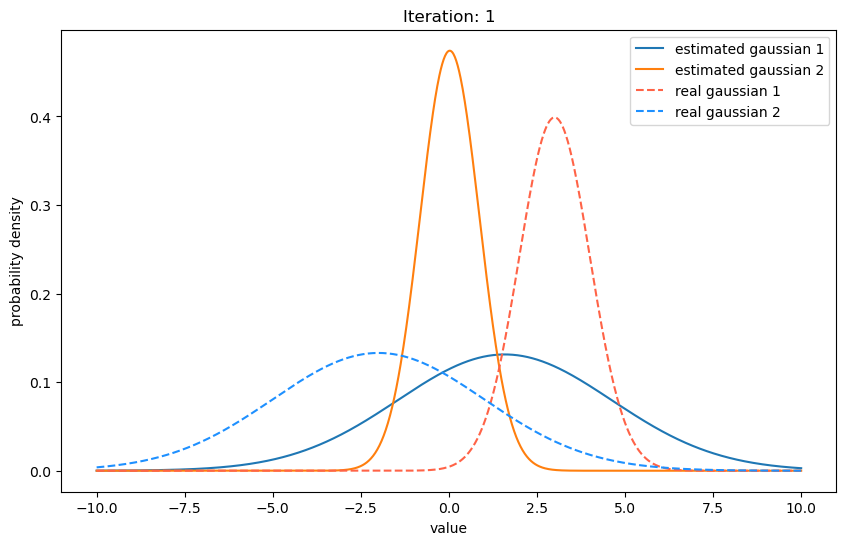

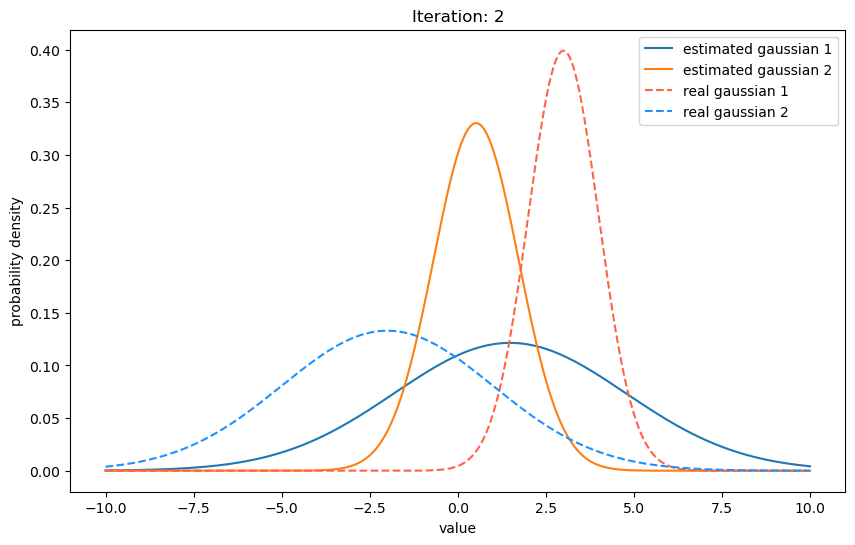

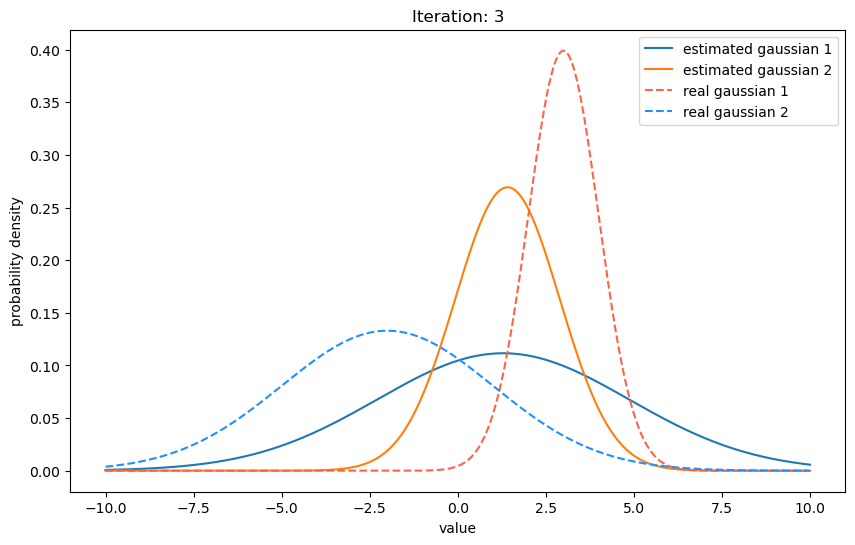

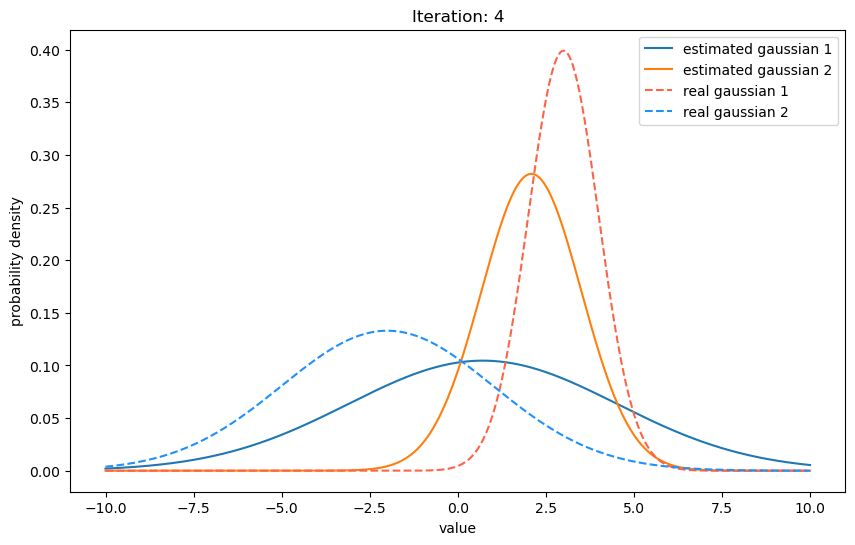

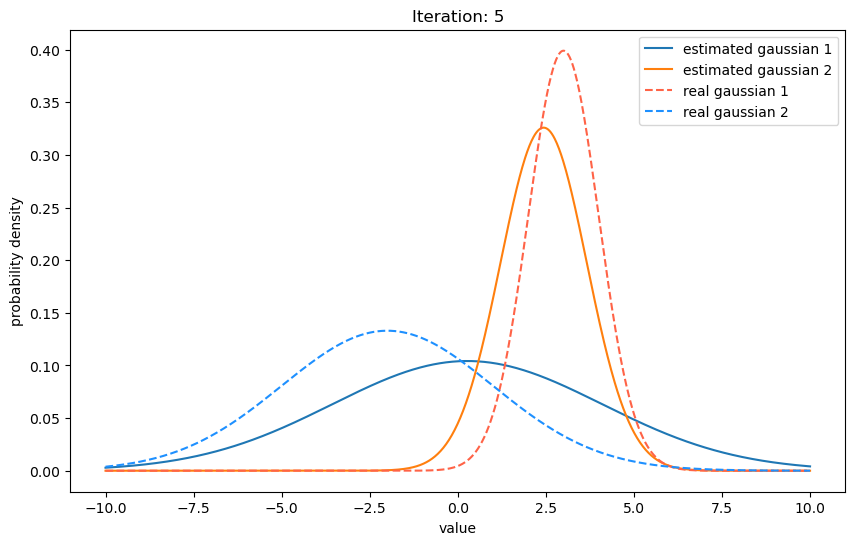

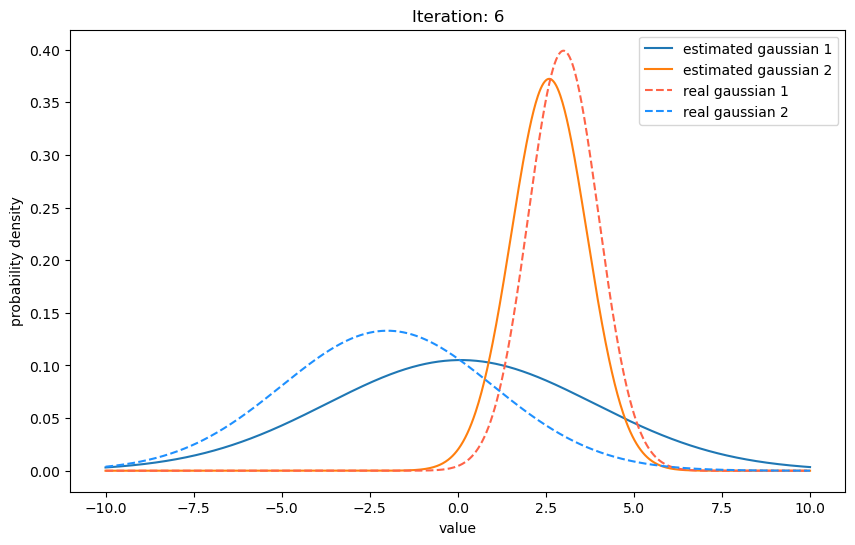

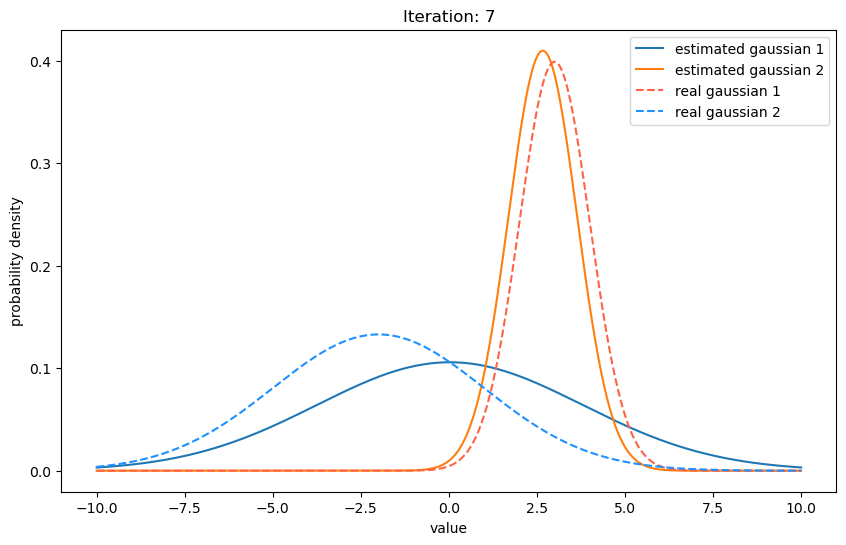

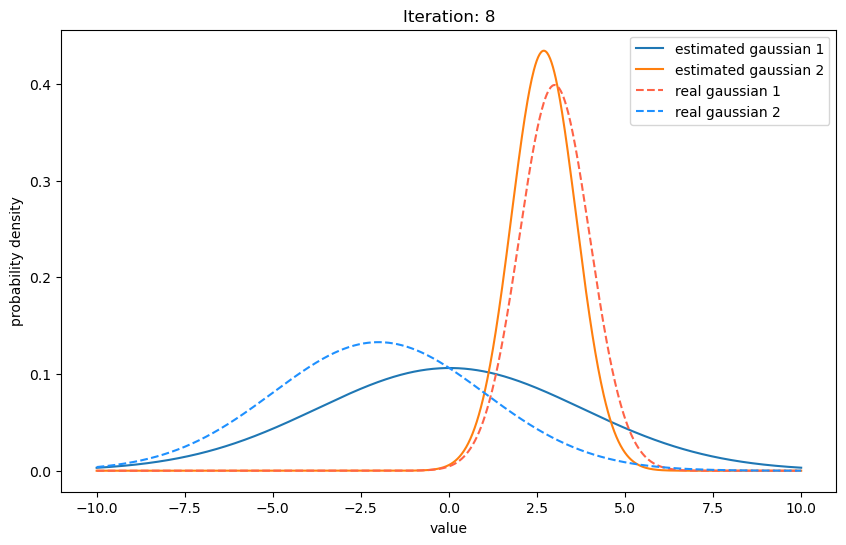

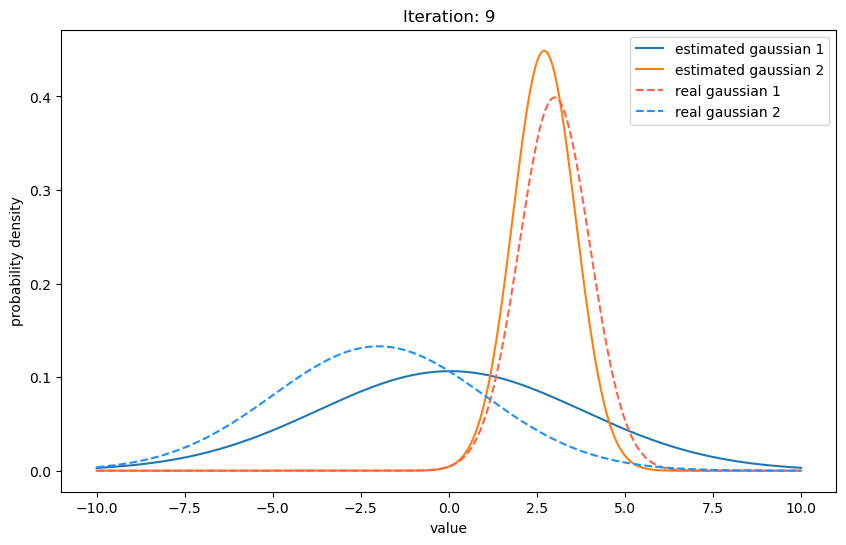

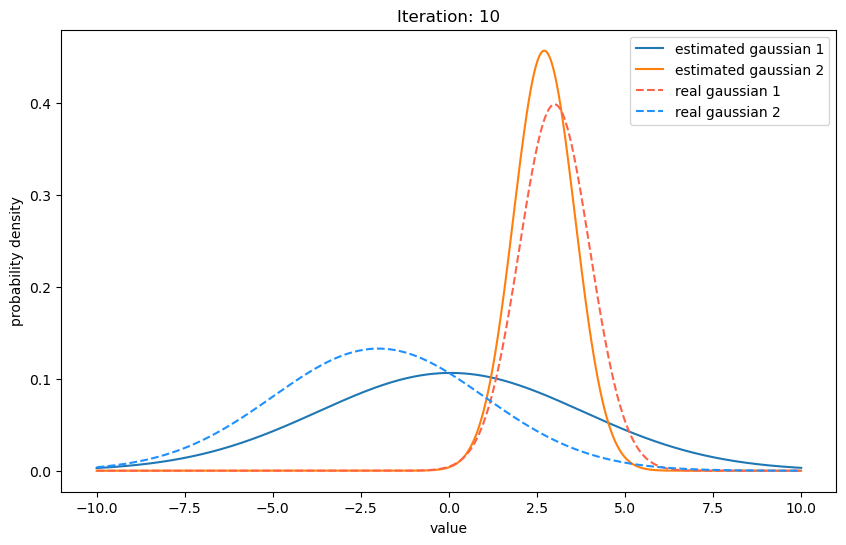

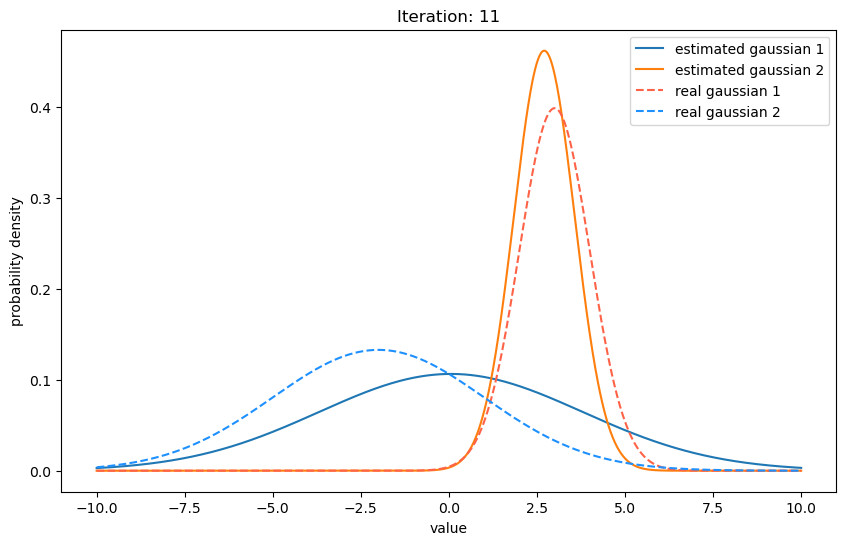

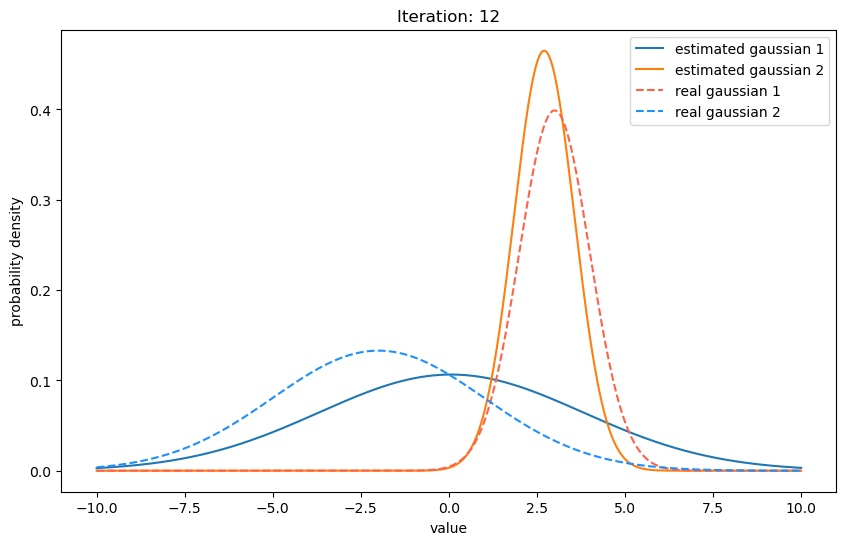

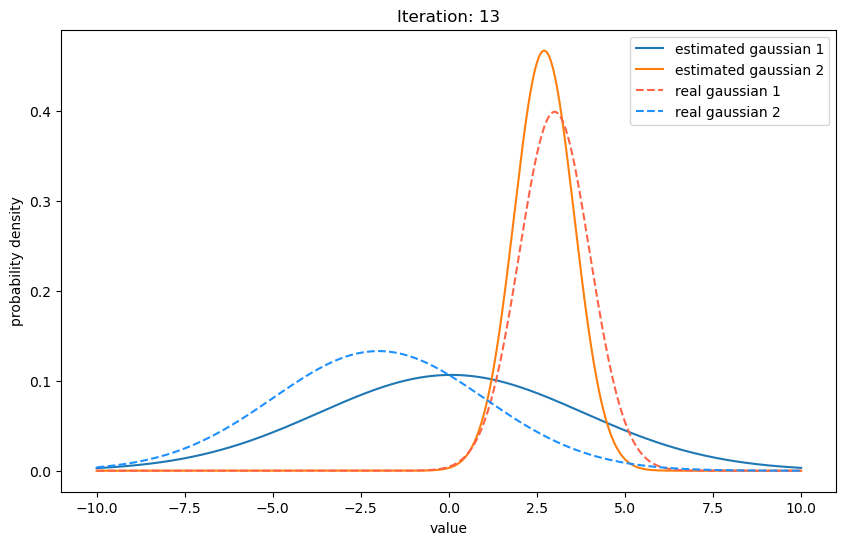

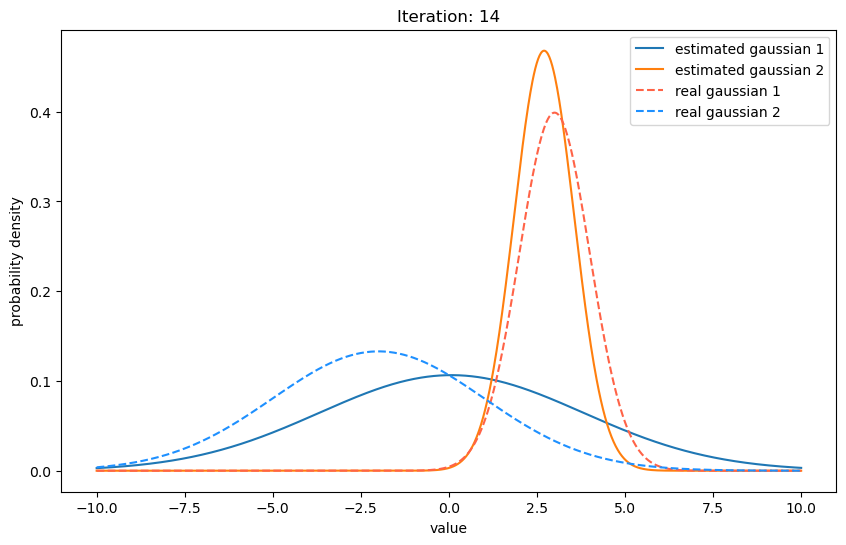

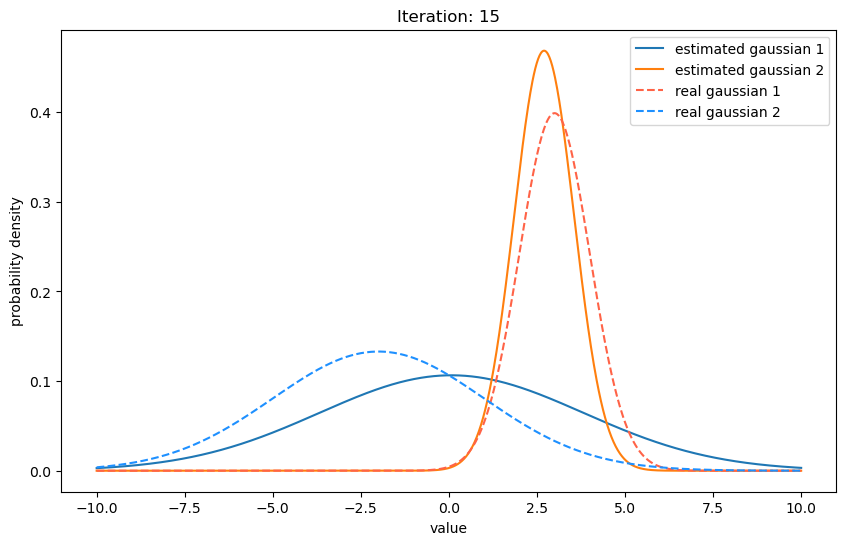

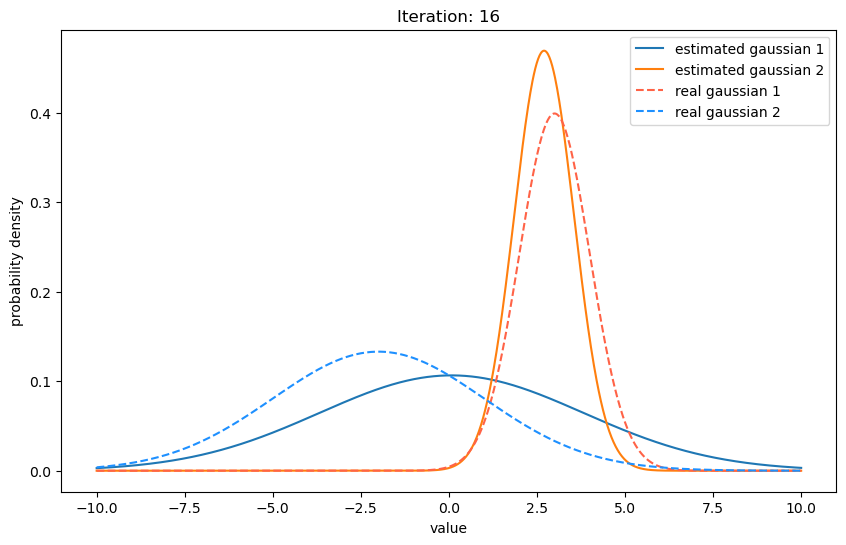

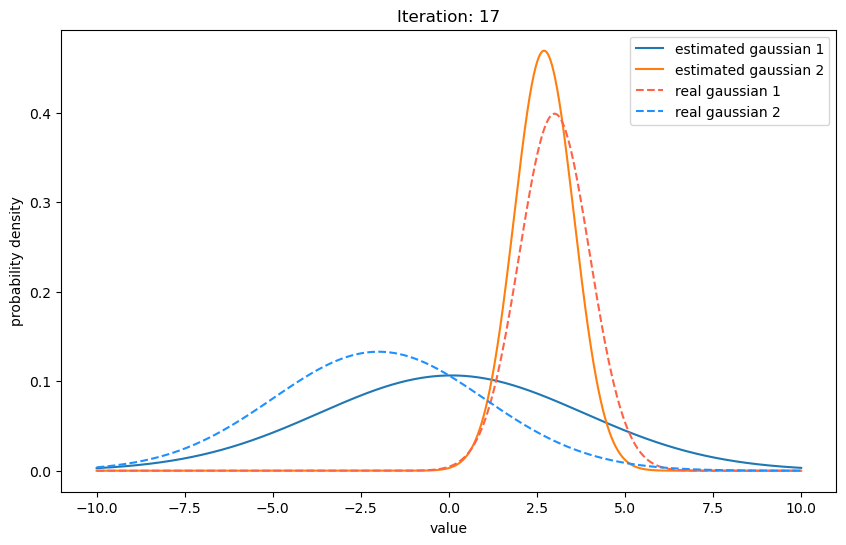

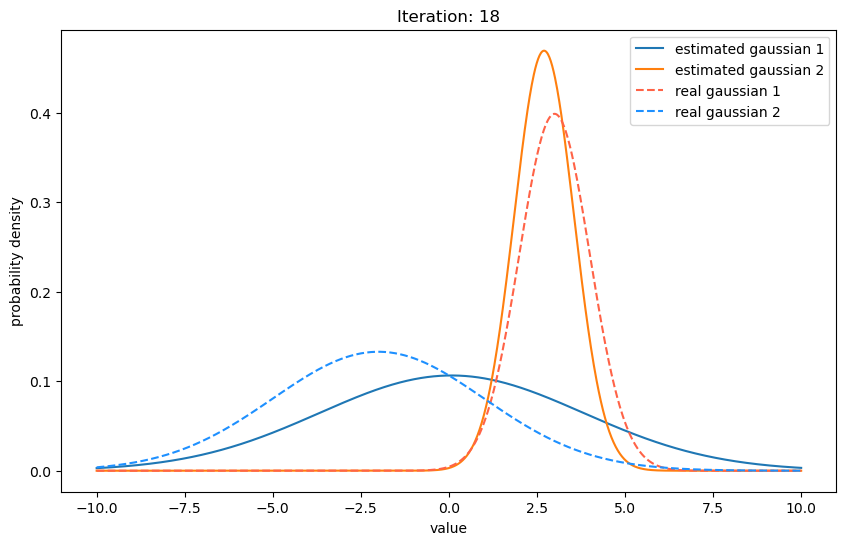

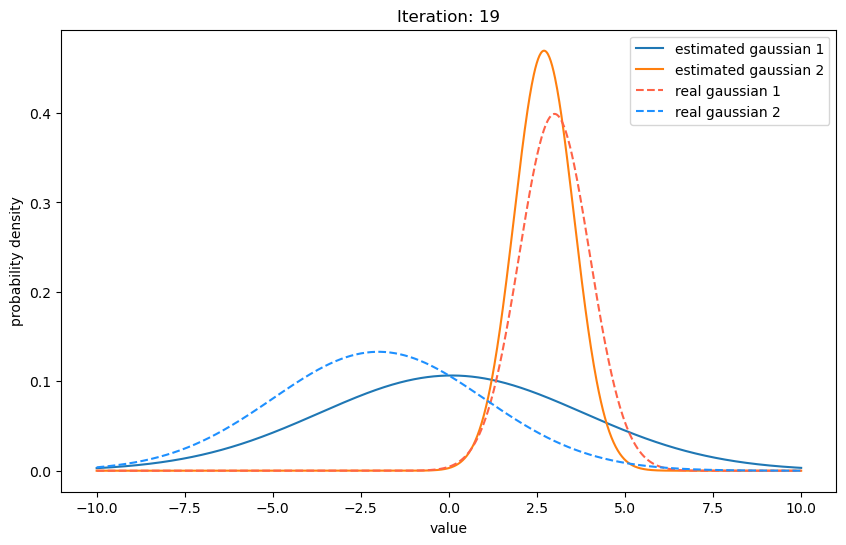

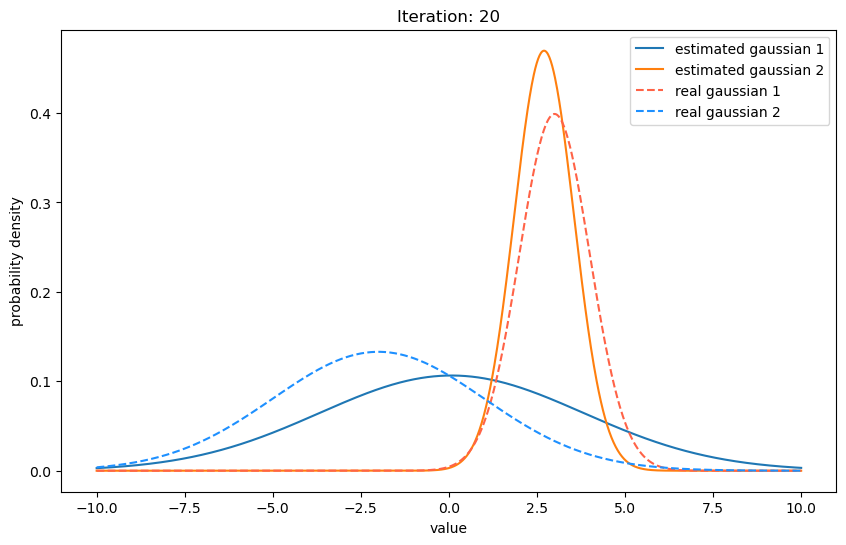

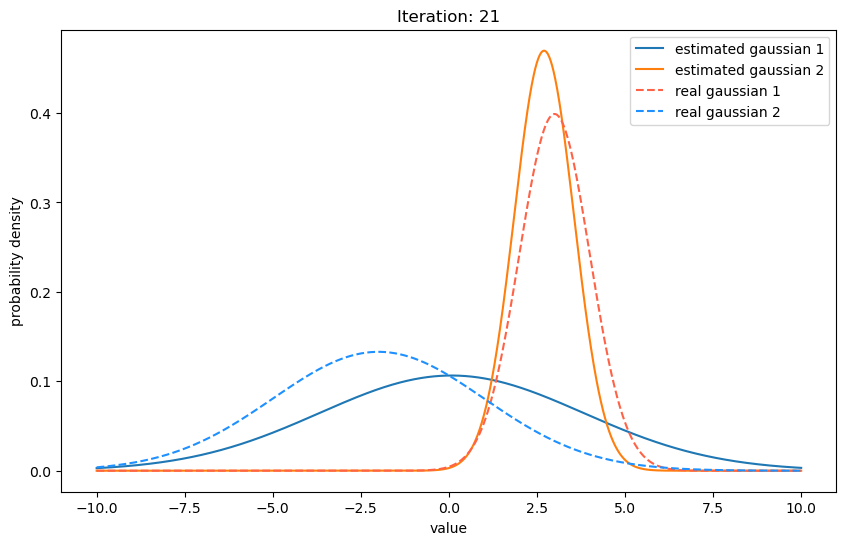

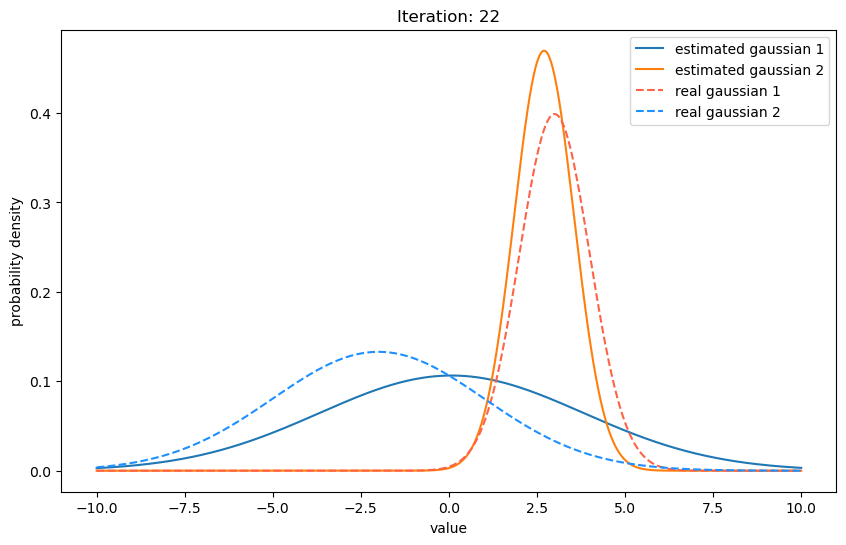

converged in 22 iterations


In [9]:
while delta > threshold and itrs < 100:
    itrs += 1
    prev_mean_1 = estimated_mean_1
    prev_mean_2 = estimated_mean_2
    prev_std_dev_1 = estimated_std_dev_1
    prev_std_dev_2 = estimated_std_dev_2

    # E step
    posterior = E_step(estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2)

    # M step
    estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2 = M_step(posterior)
    
    plot_distributions(itrs, x_values, estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2)

    delta_mean_1 = np.abs(prev_mean_1 - estimated_mean_1)
    delta_mean_2 = np.abs(prev_mean_2 - estimated_mean_2)
    delta_std_dev_1 = np.abs(prev_std_dev_1 - estimated_std_dev_1)
    delta_std_dev_2 = np.abs(prev_std_dev_2 - estimated_std_dev_2)
    delta = max(delta_mean_1, delta_mean_2, delta_std_dev_1, delta_std_dev_2)

print(f"converged in {itrs} iterations")
plt.show()


In [10]:
#pretty fucking neat!

### creating an animation:

In [11]:
# %matplotlib widget

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.set_ylim(0, max(np.max(real_gaussian_1), np.max(real_gaussian_2)) * 1.1)
# line_est_1, = ax.plot([], [], label="Estimated Gaussian 1")
# line_est_2, = ax.plot([], [], label="Estimated Gaussian 2")
# line_real_1, = ax.plot(x_values, real_gaussian_1, '--', label="Real Gaussian 1", color="tomato")
# line_real_2, = ax.plot(x_values, real_gaussian_2, '--', label="Real Gaussian 2", color="dodgerblue")
# ax.legend()

# # Assuming other necessary code and function definitions are above

# def init():
#     line_est_1.set_data(x_values, np.zeros_like(x_values))
#     line_est_2.set_data(x_values, np.zeros_like(x_values))
#     return line_est_1, line_est_2,

# def update(frame):
#     global estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2
#     posterior = E_step(estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2)
#     estimated_mean_1, estimated_mean_2, estimated_std_dev_1, estimated_std_dev_2 = M_step(posterior)
#     y_est_1 = gaussian_pdf(x_values, estimated_mean_1, estimated_std_dev_1)
#     y_est_2 = gaussian_pdf(x_values, estimated_mean_2, estimated_std_dev_2)
#     line_est_1.set_data(x_values, y_est_1)
#     line_est_2.set_data(x_values, y_est_2)
#     return line_est_1, line_est_2,

# ani = FuncAnimation(fig, update, frames=np.arange(1, 100), init_func=init, blit=True, repeat=False, interval=400)
# ani.save('em_animation.mp4', writer='ffmpeg', fps=10)
# plt.show()


